<a href="https://colab.research.google.com/github/Samarth-Kanodia/assignment1_samarth_kanodia/blob/main/Samarth_Kanodia_23117126_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DAI-101 Assignment-01



Objective:

  Perform an explorative analysis of a dataset of your choice from the Kaggle library. The analysis should be a mix of calculating relevant statistical measures, plotting and drawing applicable conclusions using both numerical and categorical variables.

  The analysis should be performed in two steps:

    1) Univariate analysis
    2) Bivariate analysis



In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [ ]:
from scipy import stats as st
from scipy.stats import chi2_contingency

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
import math

In [ ]:
from datetime import datetime

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading the file using Pandas
df = pd.read_csv("Fifa_EDA.csv")

#Data Preprocessing


In [ ]:
# displaying the first 5 values of the dataset
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,20801,Cristiano Ronaldo,33,Portugal,95,95,Juventus,120000.0,600,Right,5.0,5.0,ST,2018,01-01-2022,6.166667,183.0,230000.0
1,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565,Left,5.0,4.0,RF,2004,01-01-2021,5.583333,159.0,226500.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290,Right,5.0,5.0,LW,2017,01-01-2022,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260,Right,4.0,1.0,GK,2011,01-01-2020,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355,Right,4.0,4.0,RCM,2015,01-01-2023,5.916667,154.0,196400.0


In [ ]:
# displaying the last 5 values of the dataset
df.tail()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1,Right,1.0,2.0,CM,2017,01-01-2019,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1,Right,1.0,2.0,ST,2018,01-01-2020,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1,Right,1.0,2.0,ST,2017,01-01-2021,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1,Right,1.0,2.0,RW,2018,01-01-2019,5.833333,154.0,143.0
18206,246269,G. Nugent,16,England,46,66,Tranmere Rovers,60.0,1,Right,1.0,2.0,CM,2018,01-01-2019,5.833333,176.0,165.0


In [ ]:
# displaying a random value from the dataset
df.sample()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
15848,237832,I. Meite,21,England,58,68,Cardiff City,210.0,5,Left,1.0,2.0,ST,2017,01-01-2019,6.166667,159.0,462.0


In [ ]:
# displaying size of the dataset
df.size

327726

In [ ]:
# displaying shape of the dataset
df.shape

(18207, 18)

In [ ]:
# displaying the headings of the columns in the dataset
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause'],
      dtype='object')

In [ ]:
# displaying the datatypes of the columns in the dataset
df.dtypes

,0
ID,int64
Name,object
Age,int64
Nationality,object
Overall,int64
Potential,int64
Club,object
Value,float64
Wage,int64
Preferred Foot,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  int64  
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [ ]:
df.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,17955.000000,18207.000000,18159.000000,18159.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238754,71.307354,2446.925091,9.742022,1.113222,2.361308,2016.420607,5.946771,165.979129,4590.712644
std,29965.244204,4.669943,6.909154,6.136703,5667.453428,22.237907,0.394031,0.756164,2.018194,0.220514,15.572775,10722.507763
min,16.000000,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,200315.500000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000
50%,221759.000000,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,236529.500000,28.000000,71.000000,75.000000,2100.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,246620.000000,45.000000,95.000000,95.000000,120000.000000,600.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,230000.000000


In [ ]:
# checking null values in each column of the dataset
df.isnull().sum()

,0
ID,0
Name,0
Age,0
Nationality,0
Overall,0
Potential,0
Club,241
Value,252
Wage,0
Preferred Foot,0


In [ ]:
# checking duplicate values in the dataset
df.duplicated().sum()

0

In [ ]:
# checking count of unique values in each column of the dataset
df.nunique().values

array([18207, 17194,    29,   164,    49,    47,   651,   217,   144,
           2,     5,     5,    27,    22,    35,    22,    58,  1246])

In [ ]:
# imputing missing values for numerical features
df["International Reputation"].fillna(df["International Reputation"].median(), inplace=True)
df["Skill Moves"].fillna(df["Skill Moves"].median(), inplace=True)
df["Value"].fillna(df["Value"].median(), inplace=True)

# imputing missing values for categorical features
df["Club"].fillna("Unknown", inplace=True)

# dropping "Contract Valid Until" column
df = df.drop(['Contract Valid Until'], axis=1)

In [ ]:
# checking null values after dealing with them
df.isnull().sum()

,0
ID,0
Name,0
Age,0
Nationality,0
Overall,0
Potential,0
Club,0
Value,0
Wage,0
Preferred Foot,0


In [ ]:
# displaying data types of the columns of the dataset
df.dtypes

,0
ID,int64
Name,object
Age,int64
Nationality,object
Overall,int64
Potential,int64
Club,object
Value,float64
Wage,int64
Preferred Foot,object


#Exploratory Data Analysis

###Univariate Analysis

164
Nationality
England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
                        ... 
New Caledonia              1
Fiji                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Botswana                   1
Name: count, Length: 164, dtype: int64


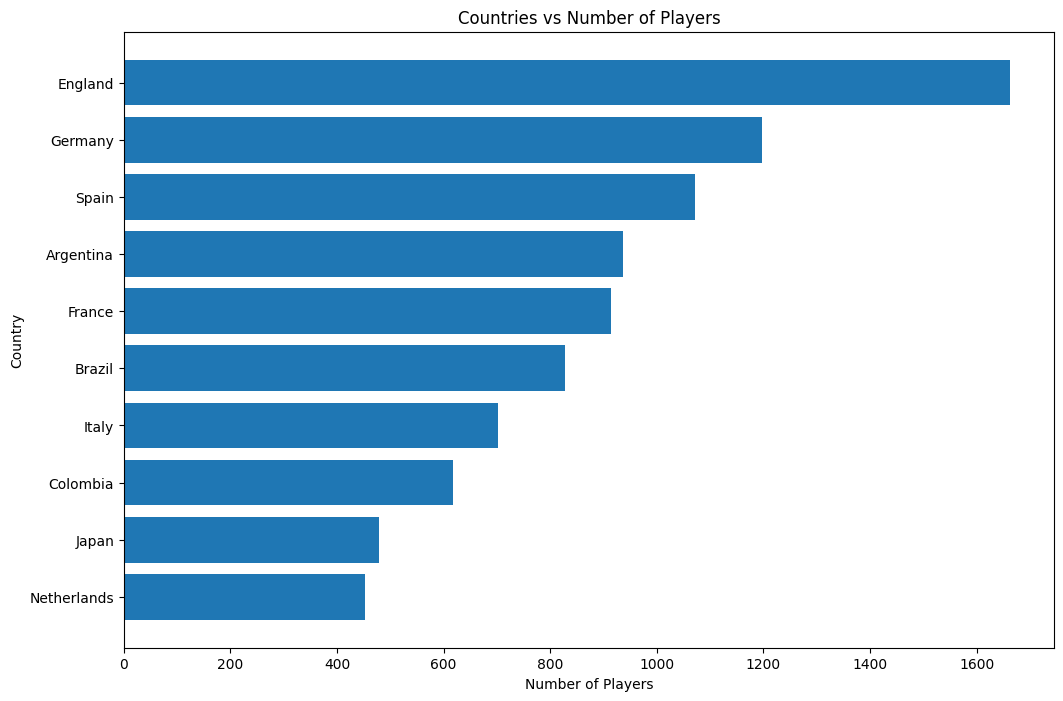

In [ ]:
# categorical
print(df['Nationality'].nunique())
print(df['Nationality'].value_counts())

fig, ax = plt.subplots(figsize = (12,8))
x = df['Nationality'].value_counts().head(10).values
y = df['Nationality'].value_counts().head(10).index
ax.barh(y, x, align = 'center')
ax.invert_yaxis()
ax.set_xlabel('Number of Players')
ax.set_ylabel('Country', rotation = 90)
plt.title('Countries vs Number of Players')
plt.show()

The above plot clearly depicts that the majority players belong to England.

652
Club
Unknown                      241
Newcastle United              33
Borussia Dortmund             33
AS Monaco                     33
TSG 1899 Hoffenheim           33
                            ... 
América FC (Minas Gerais)     20
Chapecoense                   20
Sligo Rovers                  19
Limerick FC                   19
Derry City                    18
Name: count, Length: 652, dtype: int64


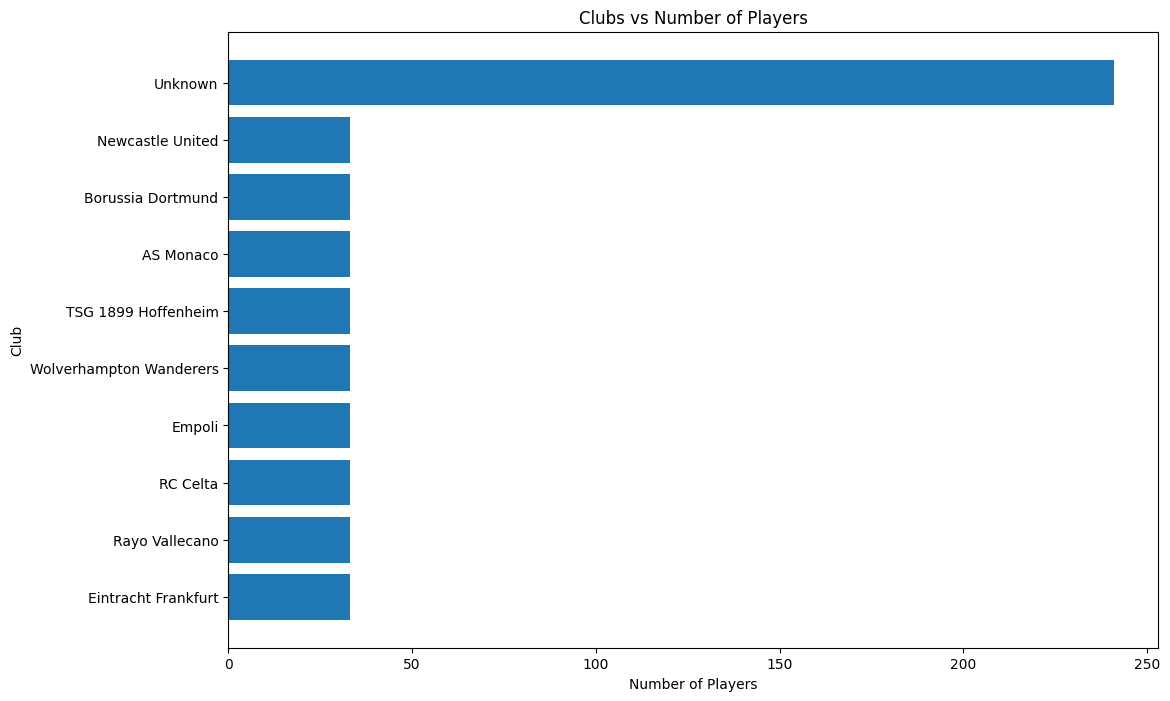

In [ ]:
print(df['Club'].nunique())
print(df['Club'].value_counts())

fig, ax = plt.subplots(figsize = (12,8))
x = df['Club'].value_counts().head(10).values
y = df['Club'].value_counts().head(10).index
ax.barh(y, x, align = 'center')
ax.invert_yaxis()
ax.set_xlabel('Number of Players')
ax.set_ylabel('Club', rotation = 90)
plt.title('Clubs vs Number of Players')
plt.show()

2
Preferred Foot
Right    13996
Left      4211
Name: count, dtype: int64


<Axes: ylabel='count'>

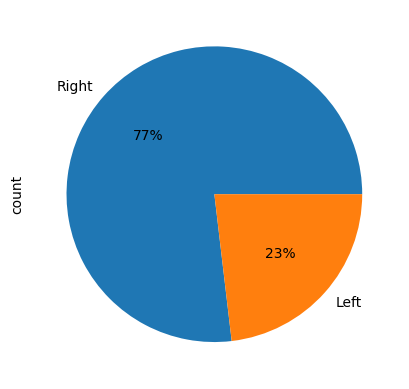

In [ ]:
print(df['Preferred Foot'].nunique())
print(df['Preferred Foot'].value_counts())

df['Preferred Foot'].value_counts().plot(kind = "pie", autopct = '%1.0f%%')

The above plot clearly depicts that majority players are right-footed.

27
Position
ST     2154
GK     2027
CB     1779
CM     1395
LB     1372
RB     1291
RM     1127
LM     1095
CAM     959
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: count, dtype: int64


<Axes: xlabel='Position'>

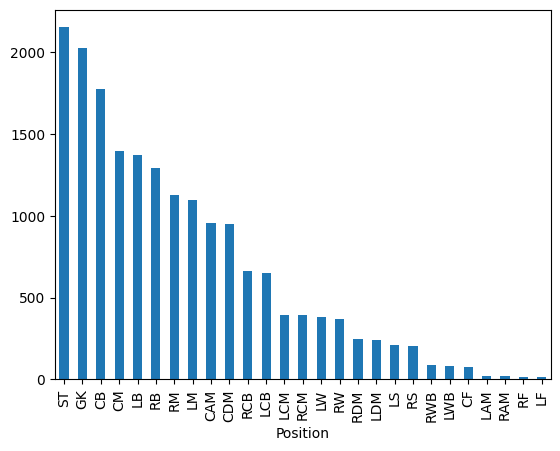

In [ ]:
print(df['Position'].nunique())
print(df['Position'].value_counts())

df['Position'].value_counts().plot(kind = "bar")

The above plot displays the distribution of palyers on the basis of the position played on field.

In [ ]:
# numerical
print(df['Age'].min())
print(df['Age'].mean())
print(df['Age'].max())

print(df['Age'].skew())

16
25.122205745043114
45
0.3917641387687474


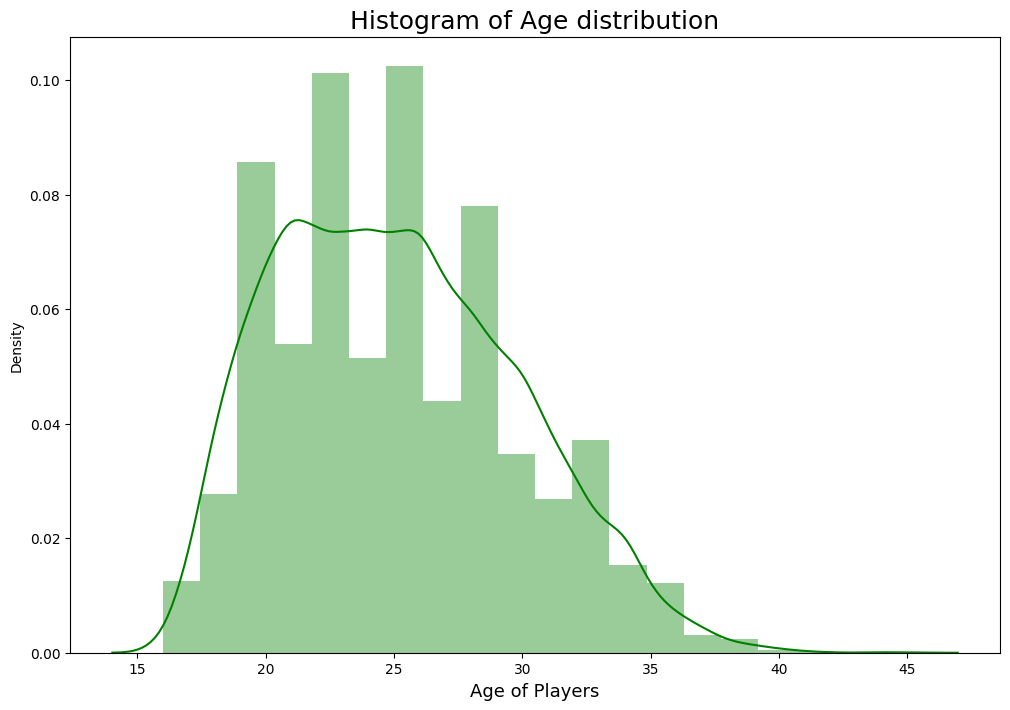

In [ ]:
x = df['Age']
plt.figure(figsize = (12, 8))
ax = sns.distplot(x, bins = 20, kde = True, color = 'g')
ax.set_xlabel(xlabel = 'Age of Players', fontsize = 13)
ax.set_title(label = 'Histogram of Age distribution', fontsize = 18)
plt.show()

The above plot displays the Age distribution of players which is slightly Right-Skewed.

In [ ]:
print(df['International Reputation'].min())
print(df['International Reputation'].mean())
print(df['International Reputation'].max())

print(df['International Reputation'].skew())

1.0
1.1129236008128742
5.0
4.066667432561947


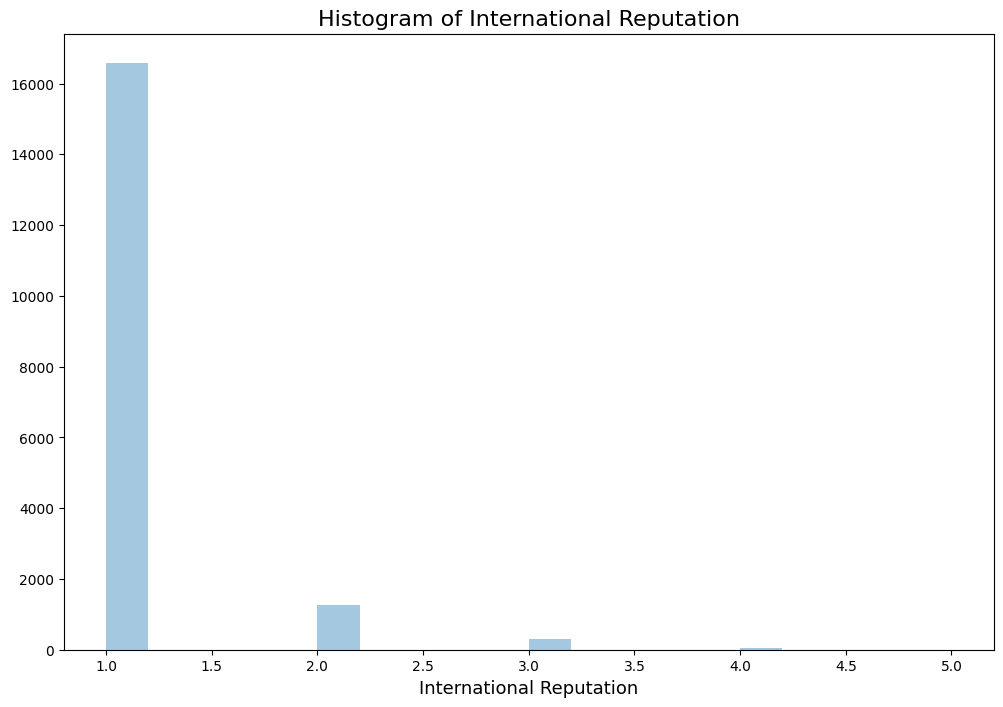

In [ ]:
x = df['International Reputation']
plt.figure(figsize = (12, 8))
ax = sns.distplot(x, bins = 20, kde = False)
ax.set_xlabel(xlabel = 'International Reputation', fontsize = 13)
ax.set_title(label = 'Histogram of International Reputation', fontsize = 16)
plt.show()

The above plot clearly depicts that most of the players have an International Reputation of 1 which is also shown by the fact that the mean is very close to the minimum value.

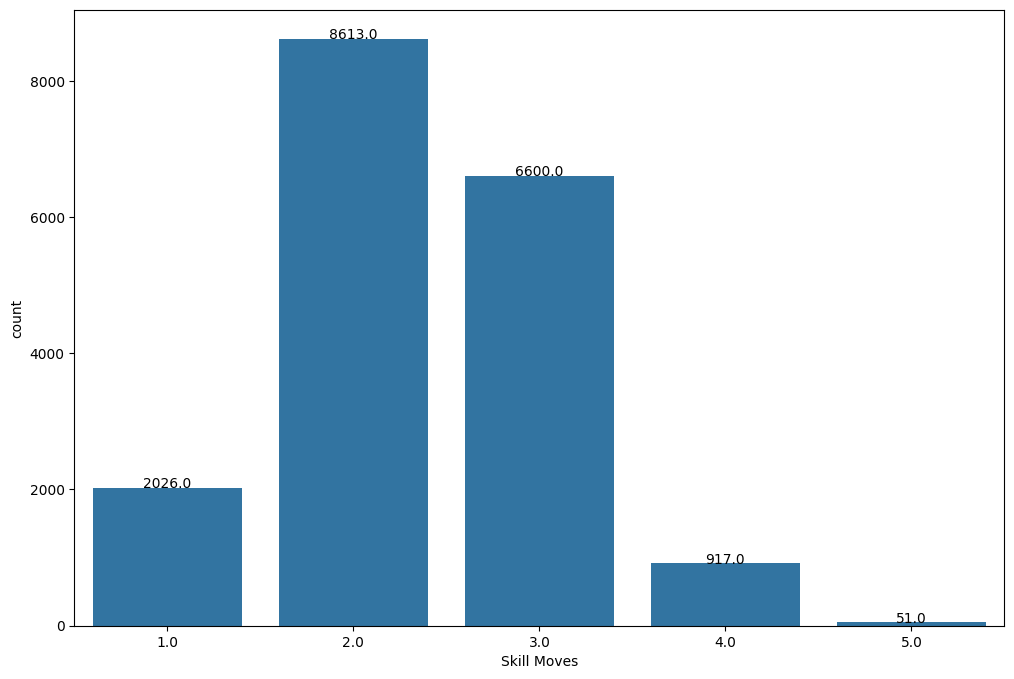

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax = ax, x = df['Skill Moves'], data = df)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, height, ha = "center")

The above plot rates the Skill Moves of different players. It is evident that very less players(51) have an incredible Skill level of 5.

10.0
2422.7461965178227
120000.0
7.298878099972474


<Axes: xlabel='Value', ylabel='Density'>

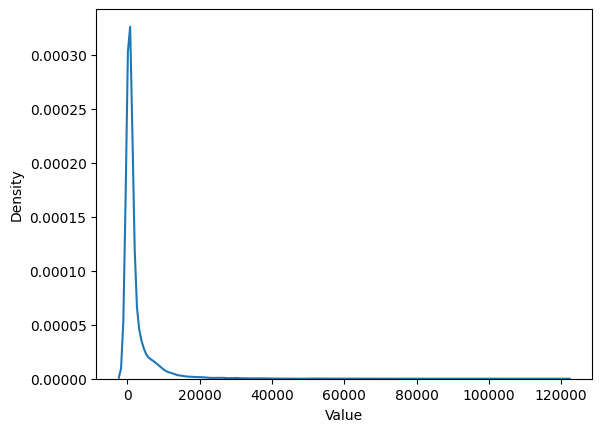

In [ ]:
print(df['Value'].min())
print(df['Value'].mean())
print(df['Value'].max())

print(df['Value'].skew())

sns.kdeplot(df['Value'])

0
9.742022299115725
600
8.371622810445274


<Axes: xlabel='Wage', ylabel='Density'>

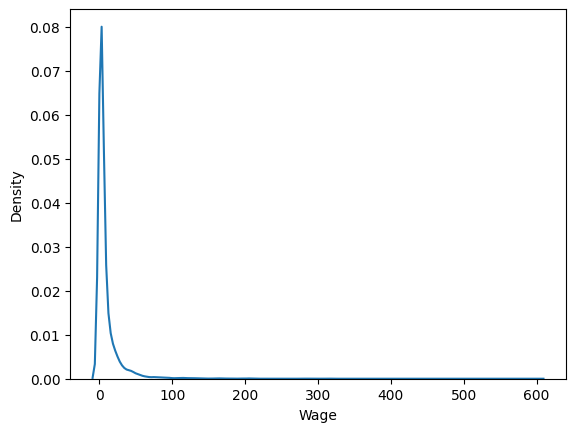

In [ ]:
print(df['Wage'].min())
print(df['Wage'].mean())
print(df['Wage'].max())

print(df['Wage'].skew())

sns.kdeplot(df['Wage'])

The above two kdeplots show that the distribution of Value and Wage among the players is Right-Skewed.

In [ ]:
print(df['Height'].min())
print(df['Height'].mean())
print(df['Height'].max())

print(df['Height'].skew())

5.083333333
5.946771114403746
6.75
-0.015476346731175837


Height distribution among the players is Left-Skewed.

In [ ]:
print(df['Weight'].min())
print(df['Weight'].mean())
print(df['Weight'].max())

print(df['Weight'].skew())

110.0
165.9791288066348
243.0
0.2168724321539744


Weight ditribution among the players is Right-Skewed.

<Axes: xlabel='Potential'>

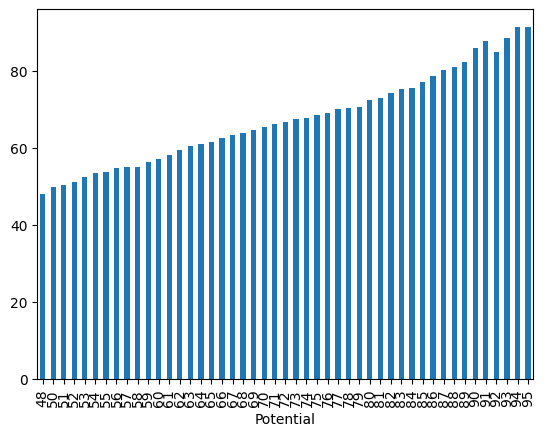

In [ ]:
df['Overall'].groupby(df['Potential']).mean().plot(kind = 'bar')

The above barplot shows positive correlation between the features 'Overall' and 'Potential'.

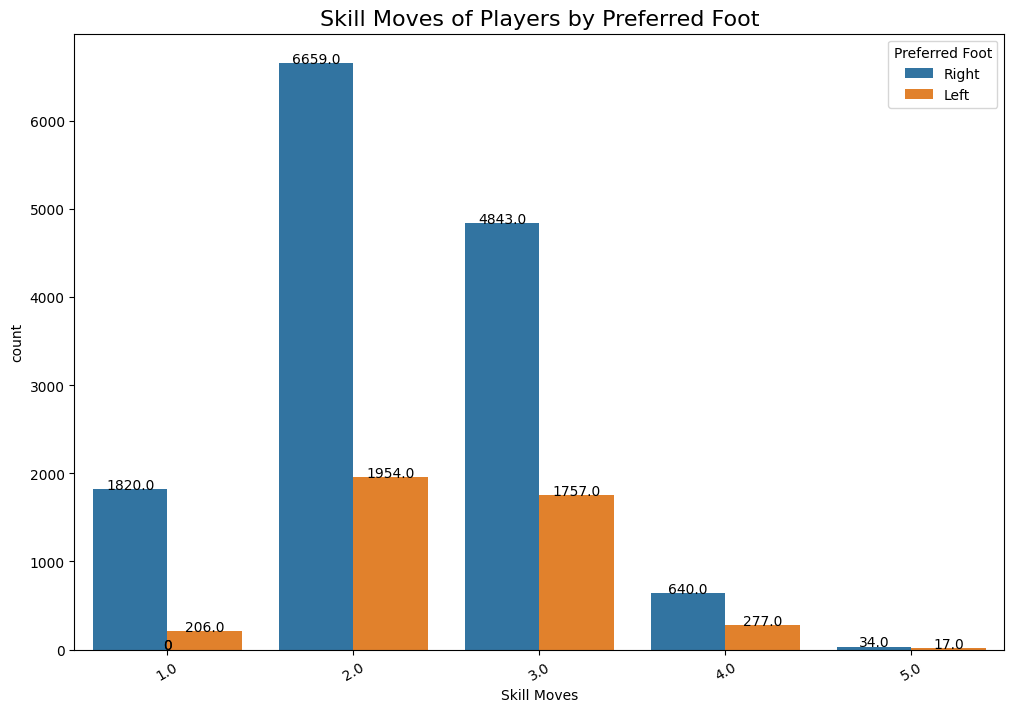

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
graph = sns.countplot(ax = ax, x = df['Skill Moves'], data = df, hue = 'Preferred Foot')
graph.set_title('Skill Moves of Players by Preferred Foot', fontsize = 16)
graph.set_xticklabels(graph.get_xticklabels(), rotation = 30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, height, ha = "center")

Data Transformation

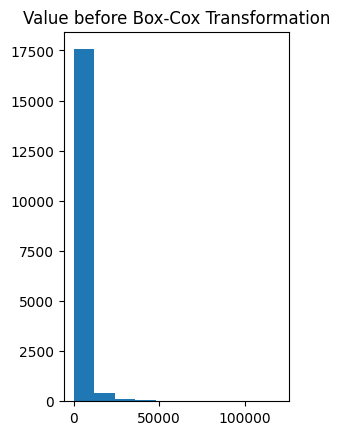

In [ ]:
# box-cox transformation
plt.subplot(1, 2, 2)
plt.hist(df['Value'], bins = 10)
plt.title('Value before Box-Cox Transformation')
plt.show()

In [ ]:
df['boxcox_vals'], lambda_value = st.boxcox(df['Value'])

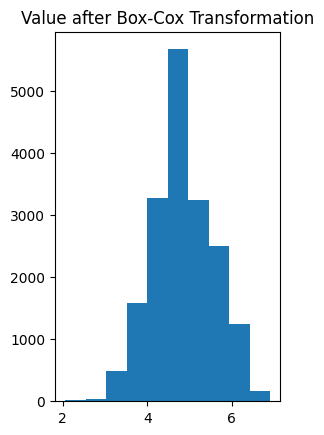

In [ ]:
plt.subplot(1, 2, 2)
plt.hist(df['boxcox_vals'], bins = 10)
plt.title('Value after Box-Cox Transformation')
plt.show()

In [ ]:
# min-max scaler
scaler = MinMaxScaler()
df['age_minmax'] = scaler.fit_transform(df[['Age']])
print(df[['Age', 'age_minmax']].head())

   Age  age_minmax
0   33    0.586207
1   31    0.517241
2   26    0.344828
3   27    0.379310
4   27    0.379310


In [ ]:
# standard scaler
scaler = StandardScaler()
df['age_zscore'] = scaler.fit_transform(df[['Age']])
print(df[['Age', 'age_zscore']].head())

   Age  age_zscore
0   33    1.686961
1   31    1.258678
2   26    0.187972
3   27    0.402113
4   27    0.402113


In [ ]:
# categorical to numerical (encoding)

In [ ]:
df_copy = df.copy()

In [ ]:
# one hot encoding
df_copy = pd.get_dummies(df_copy, columns = ['Preferred Foot'])
print(df_copy.head())

       ID               Name  Age Nationality  Overall  Potential  \
0   20801  Cristiano Ronaldo   33    Portugal       95         95   
1  158023           L. Messi   31   Argentina       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value  Wage  International Reputation  ...  \
0             Juventus  120000.0   600                       5.0  ...   
1         FC Barcelona  110500.0   565                       5.0  ...   
2  Paris Saint-Germain  118500.0   290                       5.0  ...   
3    Manchester United   72000.0   260                       4.0  ...   
4      Manchester City  102000.0   355                       4.0  ...   

   Position Joined    Height  Weight  Release Clause  boxcox_vals  age_minmax  \
0        ST   2018  6.166667   183.0        230000.0     6.903599

In [ ]:
# label encoding
le = LabelEncoder()
df['lab_enc'] = le.fit_transform(df['Preferred Foot'])
print(df[['Preferred Foot', 'lab_enc']].head())

  Preferred Foot  lab_enc
0          Right        1
1           Left        0
2          Right        1
3          Right        1
4          Right        1


###Bivariate Analysis

In [ ]:
# categorical-categorical
cross_tab = pd.crosstab(df['Preferred Foot'], df['Position'], margins = True, values = df['Overall'], aggfunc = pd.Series.count)
cross_tab

Position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,All
Preferred Foot,,,,,,,,,,,,,,,,,,,,,
Left,257,341,126,18,249,206,9,1163,264,97,...,32,41,23,6,253,37,97,4,293,4211
Right,702,1438,822,56,1146,1821,12,209,384,298,...,630,350,225,10,874,166,273,83,1861,13996
All,959,1779,948,74,1395,2027,21,1372,648,395,...,662,391,248,16,1127,203,370,87,2154,18207


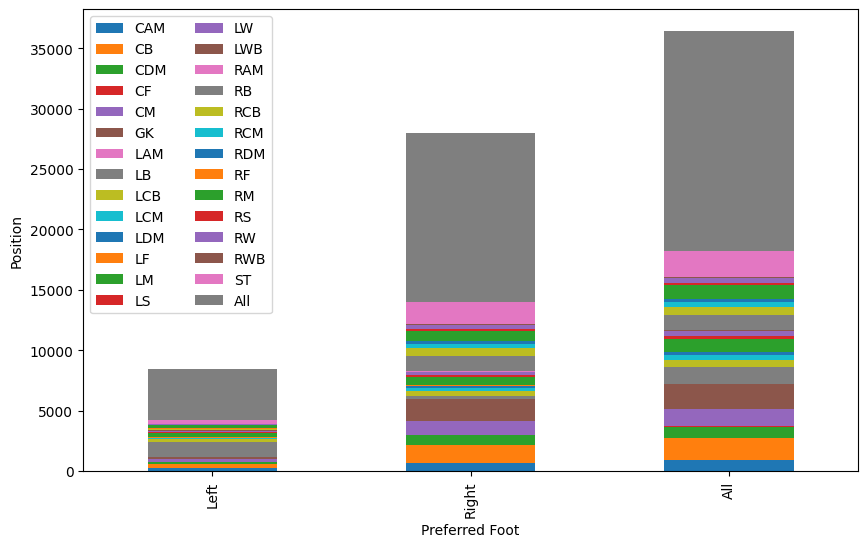

In [ ]:
cross_tab.plot(kind = 'bar', stacked = True, figsize = (10, 6))
plt.legend(loc = "upper left", ncol = 2)
plt.xlabel("Preferred Foot")
plt.ylabel("Position")
plt.show()

<Axes: xlabel='Position', ylabel='Preferred Foot'>

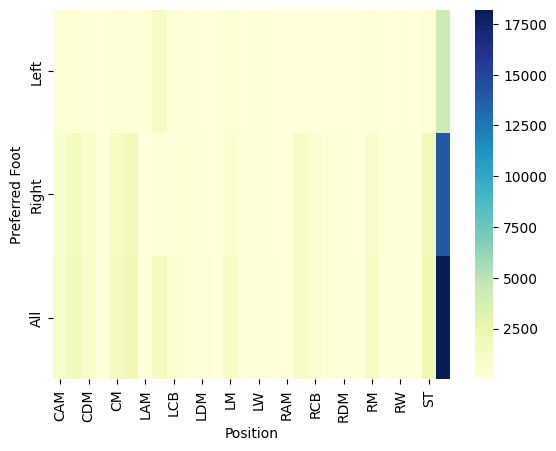

In [ ]:
sns.heatmap(cross_tab, cmap = "YlGnBu", cbar = True)

In [ ]:
contigency= pd.crosstab(df['Preferred Foot'], df['Position'])
contigency

Position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Preferred Foot,,,,,,,,,,,,,,,,,,,,,
Left,257,341,126,18,249,206,9,1163,264,97,...,14,32,41,23,6,253,37,97,4,293
Right,702,1438,822,56,1146,1821,12,209,384,298,...,1277,630,350,225,10,874,166,273,83,1861


In [ ]:
c, p, dof, expected = chi2_contingency(contigency)
print(p)

0.0


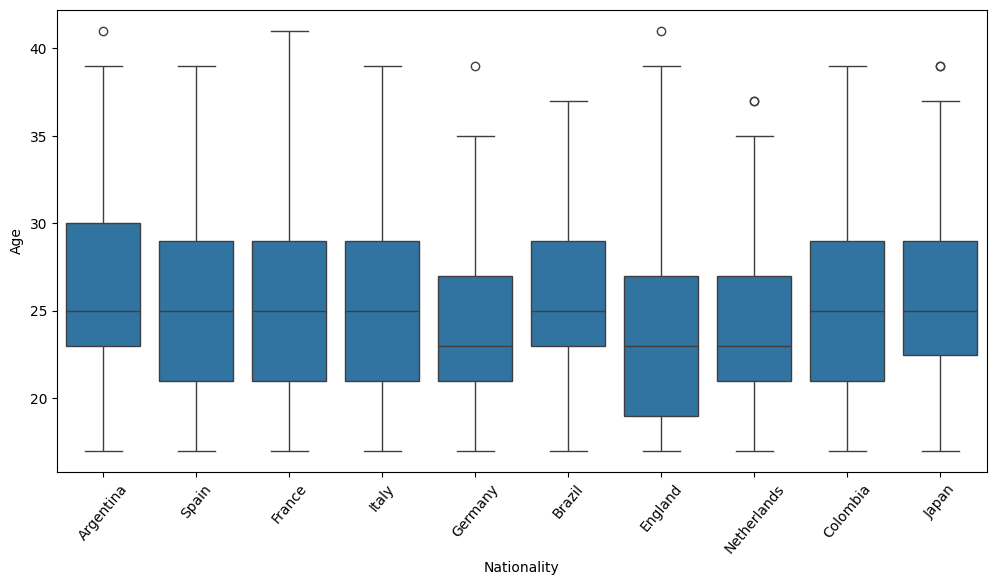

In [ ]:
# numerical-categorical
df_country_age = df.loc[df['Nationality'].isin((df['Nationality'].value_counts().head(10).index)) & df['Age']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Nationality' , y = 'Age' , data = df_country_age)
plt.xticks(rotation = 50)
plt.show()

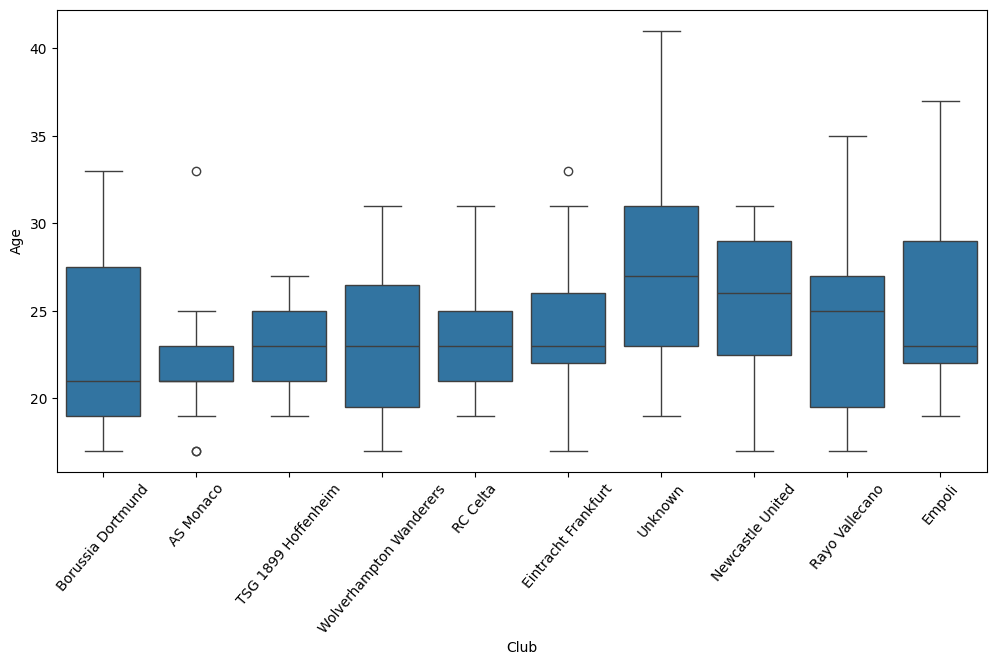

In [ ]:
df_club_age = df.loc[df['Club'].isin((df['Club'].value_counts().head(10).index)) & df['Age']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Club' , y = 'Age' , data = df_club_age)
plt.xticks(rotation = 50)
plt.show()

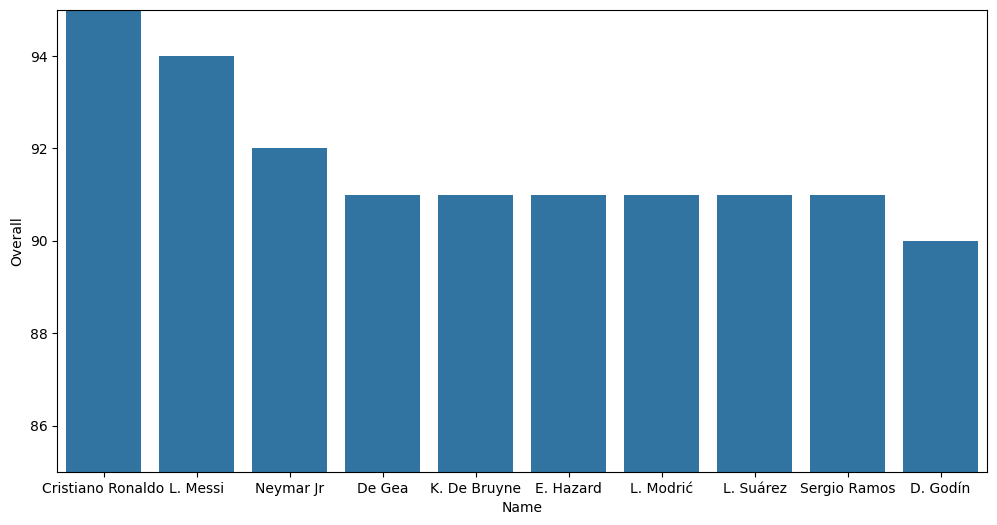

In [ ]:
df_best_players = pd.DataFrame.copy(df.sort_values(by = 'Overall', ascending = False).head(10))
plt.figure(1, figsize = (12,6))
sns.barplot(x = 'Name' , y = 'Overall' , data = df_best_players)
plt.ylim(85,95)
plt.show()

The above plot proves the already known fact that Cristiano Ronaldo is the best player and the Greatest Of All Time (GOAT).

In [ ]:
# ANOVA test
a = df.loc[df['Club'] == 'FC Barcelona', 'Wage'].to_numpy()
b = df.loc[df['Club'] == 'Paris Saint-Germain', 'Wage'].to_numpy()
c = df.loc[df['Club'] == 'Real Madrid', 'Wage'].to_numpy()
fvalue, pvalue = st.f_oneway(a,b,c)
print(fvalue, pvalue)

4.755006162673319 0.01080997827216589


In [ ]:
# t-test
a = df.loc[df['Preferred Foot'] == 'Left', 'Skill Moves'].to_numpy()
b = df.loc[df['Preferred Foot'] == 'Right', 'Skill Moves'].to_numpy()
st.ttest_ind(a = a, b = b, equal_var = True)

TtestResult(statistic=14.947794720414057, pvalue=3.1972677250975257e-50, df=18205.0)

<Axes: xlabel='Age', ylabel='Overall'>

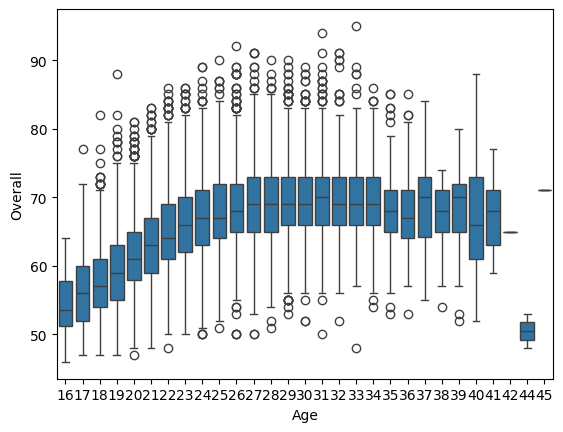

In [ ]:
# numerical-numerical
sns.boxplot(data = df, x = "Age", y = "Overall")

<Axes: xlabel='Height', ylabel='Overall'>

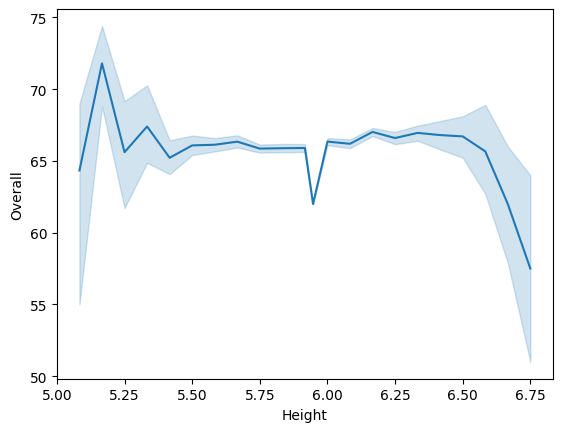

In [ ]:
sns.lineplot(data = df, x = "Height", y = "Overall")

<Axes: xlabel='Weight', ylabel='Overall'>

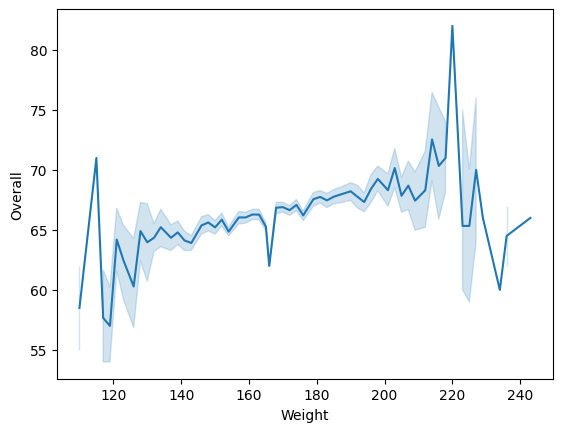

In [ ]:
sns.lineplot(data = df, x = "Weight", y = "Overall")

In [ ]:
df_num = pd.DataFrame(df[['Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Skill Moves', 'Joined', 'Height', 'Weight', 'Release Clause']])
cor = df_num.corr()
print(cor)

                               Age   Overall  Potential     Value      Wage  \
Age                       1.000000  0.452348  -0.253288  0.075944  0.140443   
Overall                   0.452348  1.000000   0.660961  0.624997  0.567917   
Potential                -0.253288  0.660961   1.000000  0.573848  0.483196   
Value                     0.075944  0.624997   0.573848  1.000000  0.860440   
Wage                      0.140443  0.567917   0.483196  0.860440  1.000000   
International Reputation  0.253457  0.499716   0.372963  0.652987  0.666301   
Skill Moves               0.027641  0.414920   0.354535  0.315082  0.262395   
Joined                   -0.202658 -0.169269  -0.047652 -0.113149 -0.140433   
Height                    0.082506  0.038534  -0.009781  0.003120  0.019908   
Weight                    0.229940  0.154561  -0.006925  0.046208  0.064596   
Release Clause            0.059057  0.594953   0.559634  0.973182  0.831732   

                          International Reputation 

<Axes: >

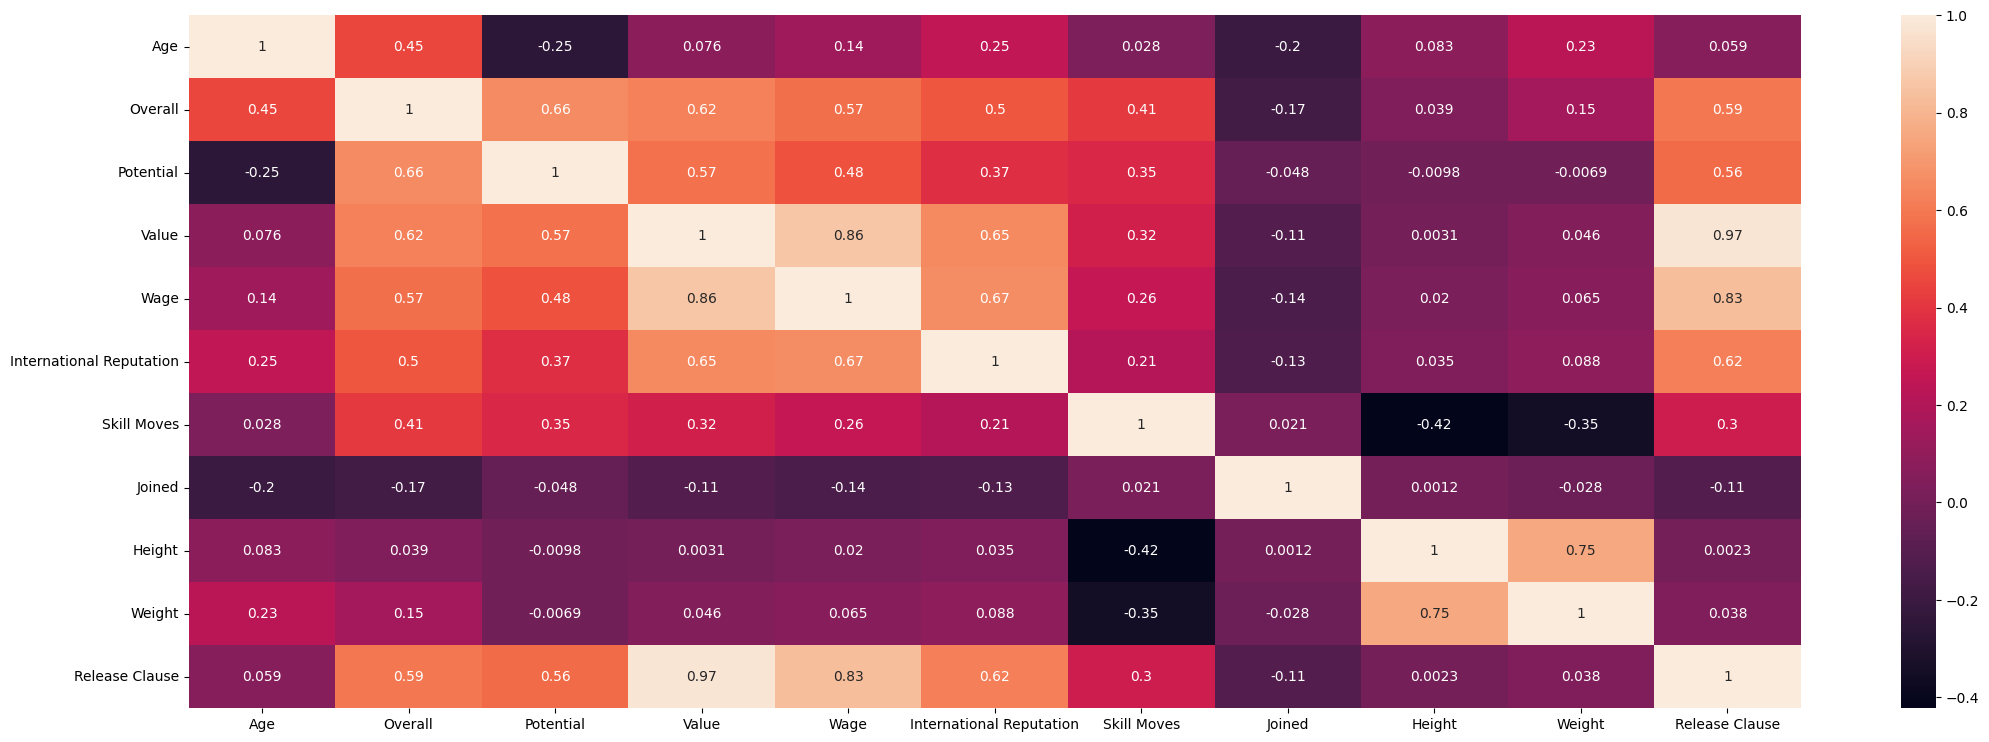

In [ ]:
plt.figure(figsize = (26, 9))
sns.heatmap(cor, annot = True)

The above correlation heatmap shows high positive correlation between the columns: Wage, Value and Release Cause.

There is also moderate positive correlation between the columns: Height and Weight, and Overall and Potential.

A negative correlation can be seen between the columns: Height and Skill Moves, and Weight and Skill Moves.

<Axes: xlabel='Height', ylabel='Weight'>

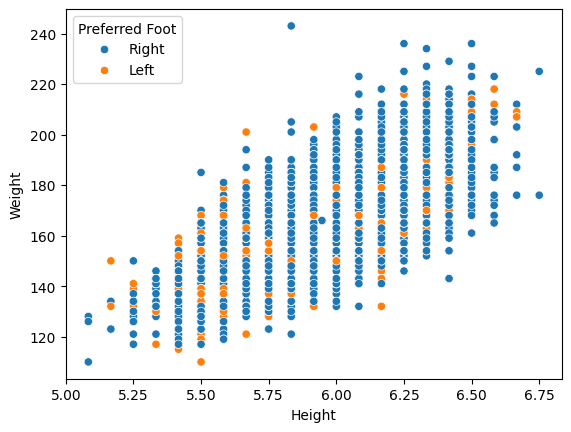

In [ ]:
sns.scatterplot(data = df, x = "Height", y = "Weight", hue = "Preferred Foot")

<Axes: xlabel='Age', ylabel='Potential'>

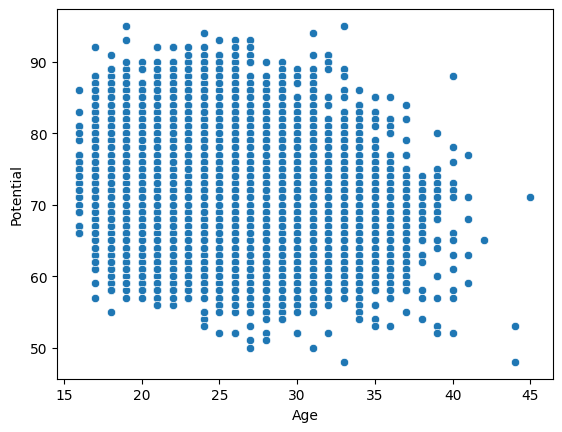

In [ ]:
sns.scatterplot(data = df, x = "Age", y = "Potential")

The above plot depicts the obvious fact that potential decreases with increase in age(>33) due to physical constraints.

<Axes: xlabel='Age', ylabel='Overall'>

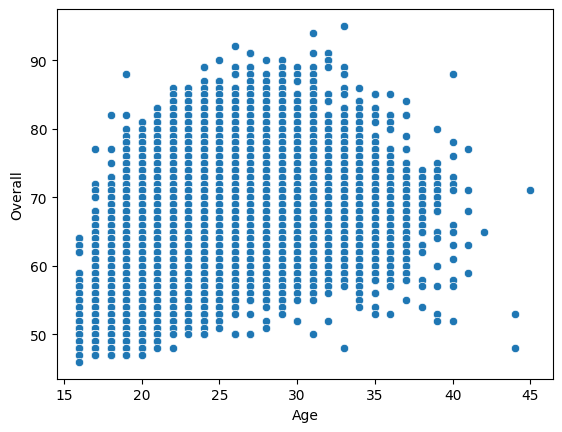

In [ ]:
sns.scatterplot(data = df, x = "Age", y = "Overall")

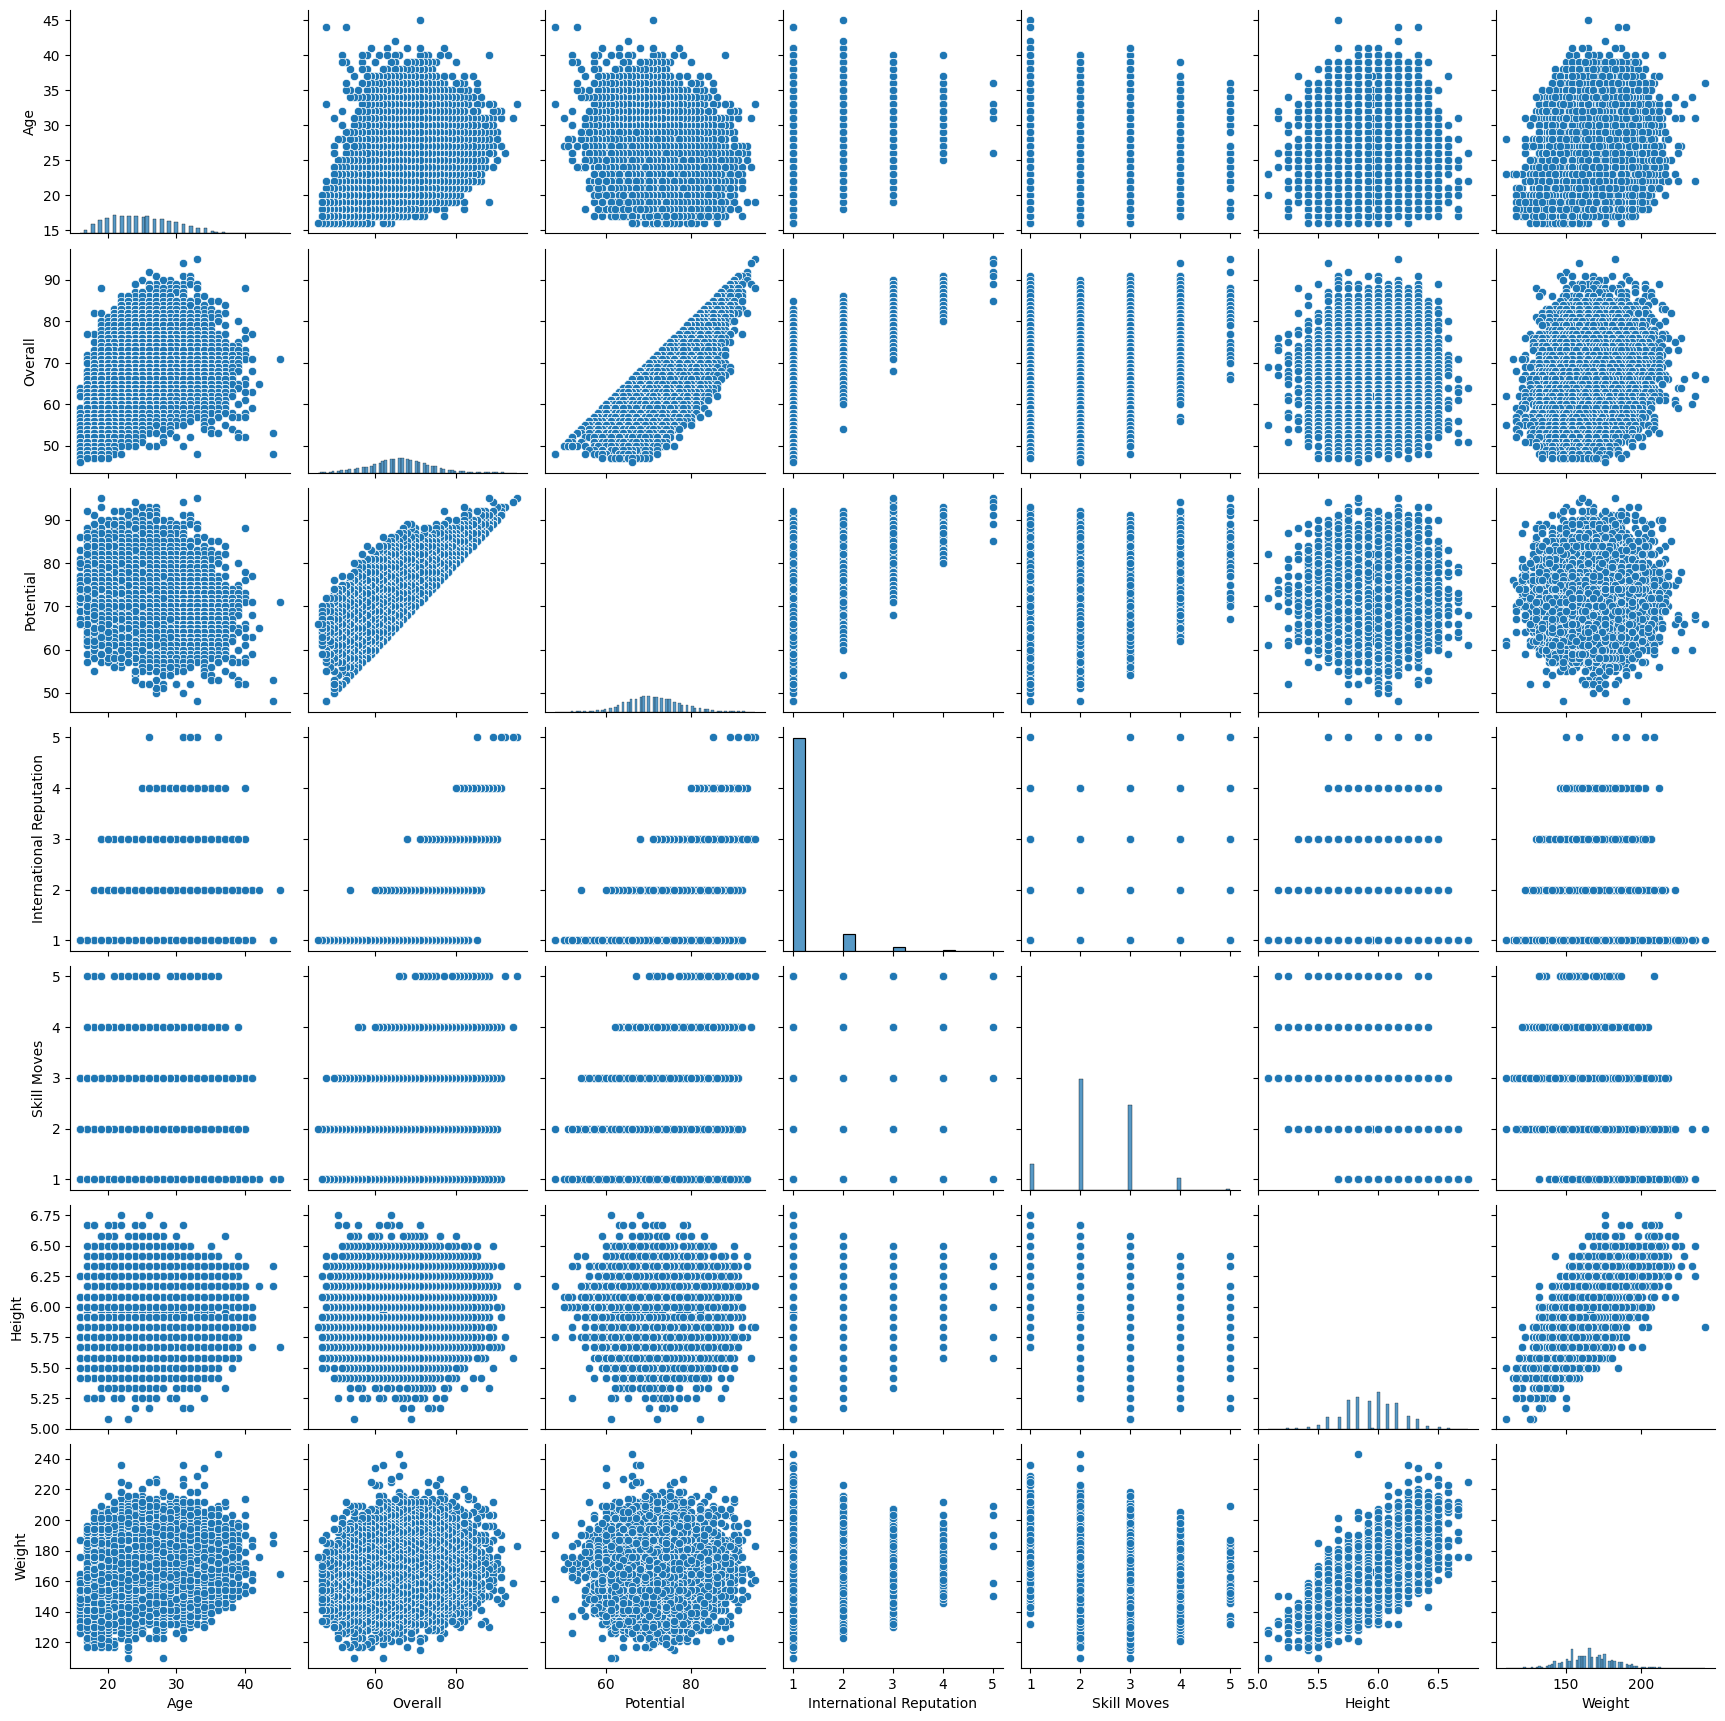

In [ ]:
sns.pairplot(df[['Age', 'Overall', 'Potential', 'International Reputation', 'Skill Moves', 'Height', 'Weight']])

## Conclusion
Exploratory Data Analysis is successfully performed on the given dataset of Fifa-19 from Kaggle.

Data preprocessing is employed to clean the data of missing and duplicated values.

Univariate and Bivariate analysis are done to find correlation, patterns, trends and insights about the dataset.

Data is transformed and encoded wherever needed.